In [7]:
!pip install scikit-plot

# **PART 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression,Ridge
import collections
from sklearn.metrics import accuracy_score ,mean_squared_error
from  sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive                      #This allows to connect with google drive to save and load the results
drive.mount('/content/drive')

Mounted at /content/drive


             p     theta      beta  nphe       ein      eout
0     0.780041  1.081480  0.989962     0  0.000000  0.000000
1     0.260929  0.778892  0.902450     0  0.000000  0.000000
2     0.773022  0.185953  0.642428     4  0.101900  0.000000
3     0.476997  0.445561  0.951471     0  0.000000  0.000000
4     2.123290  0.337332  0.908652     0  0.034379  0.049256
...        ...       ...       ...   ...       ...       ...
4995  0.254368  1.448960  0.863896    18  0.000000  0.000000
4996  1.947660  0.221036  0.910409     0  0.144793  0.176791
4997  1.698940  0.170774  1.012080     0  0.063630  0.031586
4998  0.367895  0.689006  0.932766     0  0.000000  0.000000
4999  0.789044  0.817745  0.985488     0  0.000000  0.000000

[5000 rows x 6 columns]
Counter({211: 2776, 2212: 1969, 321: 241, -11: 14})


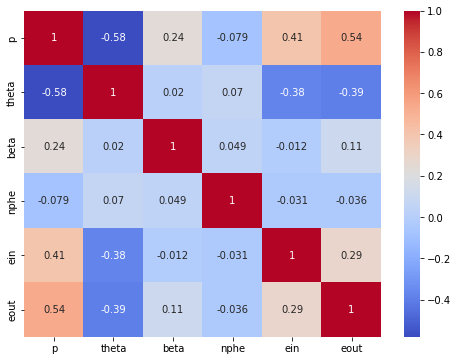

In [16]:
n_rows_used=int(0.1*(5000000/100))  #change the first value to ask
                                   # the percentage of data you want to use
                           

data = pd.read_csv("/content/drive/MyDrive/MASTER_NUC_PHYSIC/THIRD_SEMESTER/MACHINE_LEARNING/pid-5M.csv",nrows = n_rows_used)
df=data.drop(['id'],axis=1)
#correlation matrix 
print(df)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.savefig('/content/drive/MyDrive/MASTER_NUC_PHYSIC/THIRD_SEMESTER/MACHINE_LEARNING/correlation_matrix.eps', format='eps',bbox_inches='tight')

y=data.id
counter=collections.Counter(y)
print(counter)

In [4]:
for i in range(0,n_rows_used):#change the classification from 4 particles to pion and others
    if y[i]==211:             #change the id 211 for doing regression with another particle
       y[i]=0
    else:
       y[i]=1
       
dt=pd.concat((df,y),axis=1)
df_0 = dt[dt.id == abs(0)]
df_1=dt[dt.id==abs(1)]

y=dt.id #target definition 
x=dt.drop('id',axis=1)#design matrix


#scaling the data
scaler = StandardScaler()
scaler_ = StandardScaler()
scaler.fit(x) 

x_scaled= scaler.transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled=train_test_split(x_scaled,y,test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


accuracy = 0.94
MSE = 0.06
accuracy scaled = 0.57
MSE scaled = 0.43


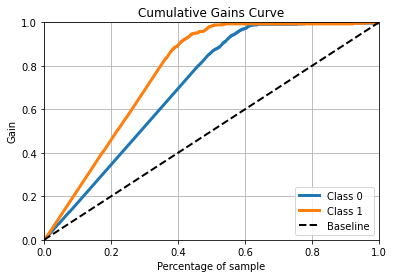

The chart shows that with adapted targeting we can find 80% of pions in 45% of sample


In [8]:

#%%
#without scaling data
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_prob=LR.predict_proba(x_test)
LR_accuracy=accuracy_score(LR_pred,y_test)
LR_mse=mean_squared_error(LR_pred,y_test)
print("accuracy = {}".format(LR_accuracy))
print("MSE = {}" .format(LR_mse))

#%%
#with scaling data
LR=LogisticRegression()
LR.fit(x_train_scaled,y_train)# warning y is not scaled
LR_pred_scaled=LR.predict(x_test_scaled)
LR_prob_scaled=LR.predict_proba(x_test_scaled)
LR_accuracy=accuracy_score(LR_pred_scaled,y_test)# warning y is not scaled
LR_mse=mean_squared_error(LR_pred_scaled,y_test)
print("accuracy scaled = {}".format(LR_accuracy))
print("MSE scaled = {}" .format(LR_mse))

#%%
#%%
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, LR_prob)
plt.savefig("Lift chart logistic regression")
plt.show()
print("The chart shows that with adapted targeting we can find 80% of pions in 45% of sample")
#%%

# **Part 2**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Counter({0: 2776, 1: 2224})
accuracy = 0.932
MSE = 0.068


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


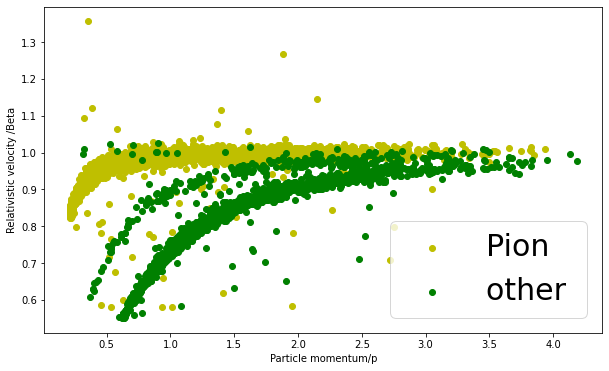

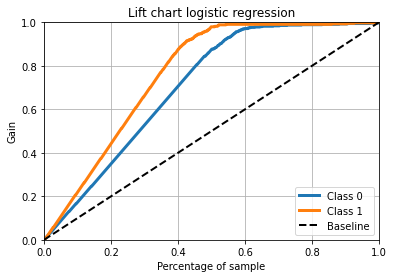

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import sklearn.linear_model as skl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,mean_squared_error
from  sklearn.model_selection import train_test_split
n_rows_used=int(0.1*(5000000/100))#change the first value to ask
                           # the percentage of data you want to use
                           
data = pd.read_csv("/content/drive/MyDrive/MASTER_NUC_PHYSIC/THIRD_SEMESTER/MACHINE_LEARNING/pid-5M.csv",nrows = n_rows_used)
df=data.drop(['id'],axis=1)


y=data.id

for i in range(0,n_rows_used):
    if y[i]==211:
       y[i]=0
    else:
       y[i]=1
       
dt=pd.concat((df,y),axis=1)

df_0 = dt[dt.id == abs(0)]
 
df_1=dt[dt.id==abs(1)]


plt.subplots(figsize=(10,6))
plt.scatter(df_0.p,df_0.beta,color='y',label='Pion')
plt.scatter(df_1.p,df_1.beta,color='g',label='other ')
plt.xlabel('Particle momentum/p')
plt.ylabel('Relativistic velocity /Beta')
plt.legend(loc="lower right", fontsize=30)

y=dt.id
counter=collections.Counter(y) #number of data for each indew
print(counter)

x=dt.drop('id',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


#%%

LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_prob=LR.predict_proba(x_test)
LR_accuracy=accuracy_score(LR_pred,y_test)
LR_mse=mean_squared_error(LR_pred,y_test)
print("accuracy = {}".format(LR_accuracy))
print("MSE = {}" .format(LR_mse))

#%%

import scikitplot as skplt
plt.plot(figsize = (10, 6))
skplt.metrics.plot_cumulative_gain(y_test, LR_prob,title='Lift chart logistic regression')
plt.savefig('/content/drive/MyDrive/MASTER_NUC_PHYSIC/THIRD_SEMESTER/MACHINE_LEARNING/lift_chart.eps', format='eps',bbox_inches='tight')
plt.show()
#%%

# **Part 3**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.metrics import accuracy_score ,mean_squared_error
from  sklearn.model_selection import train_test_split

percentage_read=[0.1,1,10,20,50,75,100]
mse=[]
accuracy=[]
for j in range(len(percentage_read)):
    n_rows_used=int(percentage_read[j]*(5000000/100))#loop on the amount of reading data
                           
    data = pd.read_csv("/content/drive/MyDrive/MASTER_NUC_PHYSIC/THIRD_SEMESTER/MACHINE_LEARNING/pid-5M.csv",nrows = n_rows_used)
    #data = pd.read_csv("/content/drive/MyDrive/MASTER_NUC_PHYSIC/THIRD_SEMESTER/MACHINE_LEARNING/pid-5M.csv",nrows = n_rows_used)
    df=data.drop(['id'],axis=1)


    y=data.id   
    for i in range(0,n_rows_used):#change the classification from 4 particles to pion and other
        if y[i]==211:               #change the id 211 for doiing regression with another particle
            y[i]=0
        else:
            y[i]=1       

    dt=pd.concat((df,y),axis=1)

    df_0 = dt[dt.id == abs(0)]
 
    df_1=dt[dt.id==abs(1)]


    y=dt.id #target definition 
    counter=collections.Counter(y)
    print(counter)
    x=dt.drop('id',axis=1)#design matrix

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

    #%%
    #without scaling data
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    LR_pred=LR.predict(x_test)
    LR_prob=LR.predict_proba(x_test)
    LR_accuracy=accuracy_score(LR_pred,y_test)
    LR_mse=mean_squared_error(LR_pred,y_test)
    mse.append(LR_mse)
    accuracy.append(LR_accuracy)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Counter({0: 2776, 1: 2224})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Counter({0: 27974, 1: 22026})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


KeyboardInterrupt: ignored

In [ ]:
#%%
plt.figure(1)   
plt.plot(percentage_read,mse,label="mse test ")
plt.title("mse as a function of amount of data")
plt.xlabel("percetage of data used")
plt.xscale=("log")
plt.legend()
plt.savefig("mse_nrows")


plt.figure(2)   
plt.plot(percentage_read,accuracy,label="accuracy test ")
plt.title("accuracy as a function of amount of data")
plt.xlabel("percentage of data used")
plt.ylabel("accuracy")
#plt.xscale("log")
plt.legend()
plt.savefig("accuracy_nrows")

plt.show()   
#runing time 2days and 18h 42min